In [25]:
import pandas as pd

## Data is retrieved from API using 00_import.py

# 00 - Read in data

In [26]:
df = pd.read_parquet('data/00_data.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474507 entries, 516153 to 141293
Data columns (total 38 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gen            474507 non-null  object        
 1   sp             474507 non-null  object        
 2   ssp            474507 non-null  object        
 3   group          474487 non-null  object        
 4   en             474507 non-null  object        
 5   rec            474507 non-null  object        
 6   cnt            474507 non-null  object        
 7   loc            474507 non-null  object        
 8   lat            457197 non-null  object        
 9   lng            457204 non-null  object        
 10  alt            474507 non-null  object        
 11  type           474507 non-null  object        
 12  sex            474507 non-null  object        
 13  stage          474507 non-null  object        
 14  method         474507 non-null  object        


In [27]:
df.groupby('group')['group'].count()

group
birds           474424
grasshoppers        63
Name: group, dtype: int64

In [28]:
df = df[df['group'] == 'birds' ]

In [29]:
df.groupby('stage')['stage'].count()

stage
                              424691
adult                          38043
adult, juvenile                  603
adult, juvenile, nestling          8
adult, juvenile, uncertain        12
adult, nestling                  142
adult, uncertain                 278
juvenile                        3866
juvenile, nestling                92
juvenile, uncertain                5
nestling                         424
nestling, uncertain                1
uncertain                       6259
Name: stage, dtype: int64

<AxesSubplot: >

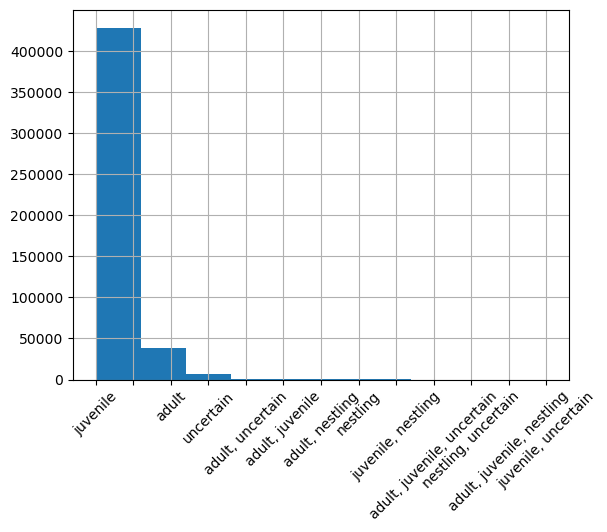

In [30]:
df['stage'].hist(xrot=45)

In [31]:
df.groupby('method')['method'].count()

method
field recording                 473615
field recording, in the hand       206
in net                               1
in the hand                        599
unknown                              3
Name: method, dtype: int64

<AxesSubplot: >

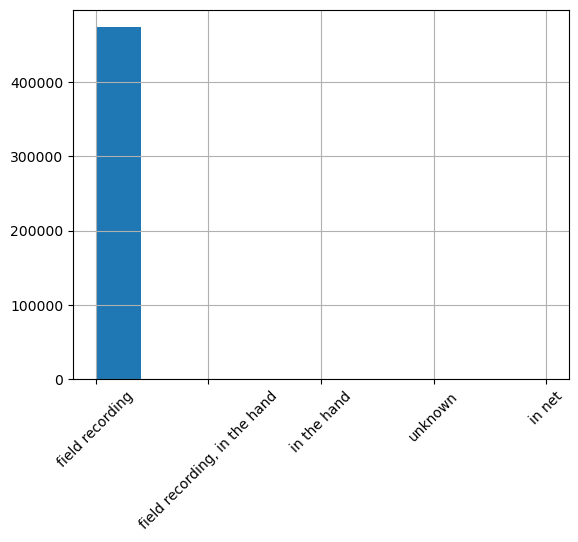

In [32]:
df['method'].hist(xrot=45)

In [33]:
df.groupby('gen')['gen'].count()

gen
Abeillia          18
Abroscopus       168
Aburria           69
Acanthagenys      72
Acanthidops       20
                ... 
Zonotrichia     1976
Zoonavena          5
Zoothera         259
Zosterops       1578
Zosterornis       31
Name: gen, Length: 2239, dtype: int64

In [34]:
df.groupby('smp')['smp'].count()

smp
0             5
11025       252
12000         8
16000      2211
22050      6854
24000      1053
32000      4621
44100    320300
48000    138546
8000        344
88200        13
96000       216
Name: smp, dtype: int64

In [35]:
df[ 'smp' ] = pd.to_numeric(df[ 'smp' ])

In [36]:
df.groupby('smp')['smp'].count()

smp
0.0             5
8000.0        344
11025.0       252
12000.0         8
16000.0      2211
22050.0      6854
24000.0      1053
32000.0      4621
44100.0    320300
48000.0    138546
88200.0        13
96000.0       216
Name: smp, dtype: int64

In [37]:
df['smp'].dtype # Why the heck is it chosing 'float64' ??

dtype('float64')

In [38]:
df['sono'].head()

id
516153    {'full': '//xeno-canto.org/sounds/uploaded/YTU...
208209    {'full': '//xeno-canto.org/sounds/uploaded/XKX...
208128    {'full': '//xeno-canto.org/sounds/uploaded/XKX...
46725     {'full': '//xeno-canto.org/sounds/uploaded/DNK...
673753    {'full': '//xeno-canto.org/sounds/uploaded/HMB...
Name: sono, dtype: object

In [46]:
df['length'].isnull().values.any()

False

<AxesSubplot: >

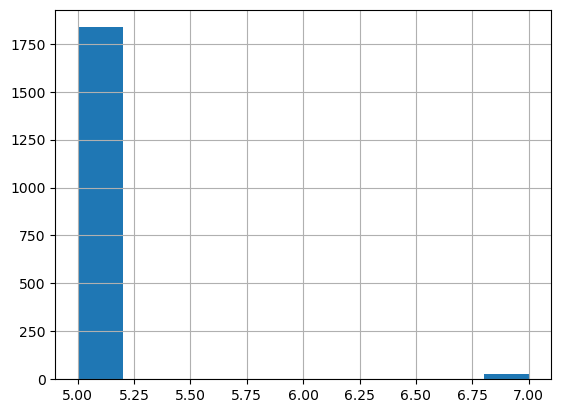

In [68]:
df[ df['length'].str.len() > 4 ]['length'].str.len().hist()

In [59]:
df[ df['length'].str.len() == 4 ]['length'].head()

id
516153    0:53
208209    0:26
208128    0:04
46725     0:11
673753    0:11
Name: length, dtype: object

In [60]:
df[ df['length'].str.len() == 5 ]['length'].head()

id
622161    18:11
397374    11:52
516858    10:47
516856    14:49
517096    11:59
Name: length, dtype: object

In [62]:
df[ df['length'].str.len() == 7 ]['length'].head()

id
508278    1:22:54
178537    2:02:50
164431    1:10:31
125316    1:25:01
180004    1:43:48
Name: length, dtype: object

In [74]:
df[ df['length'].str.contains('\?') == True]

,gen,sp,ssp,group,en,rec,cnt,loc,lat,lng,...,bird-seen,animal-seen,playback-used,temp,regnr,auto,dvc,mic,smp,area
id,,,,,,,,,,,,,,,,,,,,,


<AxesSubplot: >

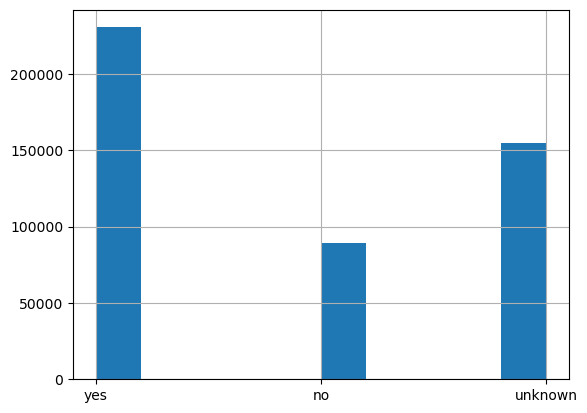

In [76]:
df['bird-seen'].hist()

<AxesSubplot: >

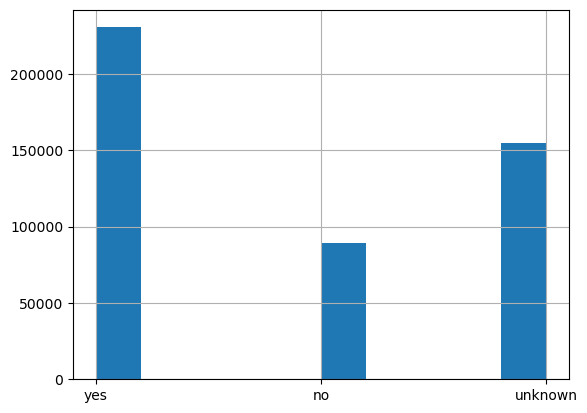

In [77]:
df['animal-seen'].hist()

In [87]:
df['also'].head()

id
516153                                                   []
208209                               [Caprimulgus rufigena]
208128                                                   []
46725                                                    []
673753    [Tricholaema leucomelas, Sylvia subcoerulea, S...
Name: also, dtype: object

In [93]:
df.loc[673753]['also']

array(['Tricholaema leucomelas', 'Sylvia subcoerulea',
       'Spilopelia senegalensis'], dtype=object)

TypeError: dtype '<class 'pandas.core.arrays.string_.StringArray'>' not understood

<AxesSubplot: >

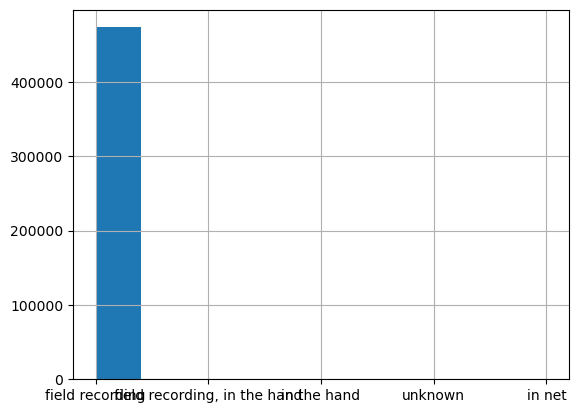

In [97]:
df['method'].hist()

In [98]:
df['method'].astype('category')

id
516153    field recording
208209    field recording
208128    field recording
46725     field recording
673753    field recording
               ...       
671268    field recording
584096    field recording
541264    field recording
488901    field recording
141293    field recording
Name: method, Length: 474424, dtype: category
Categories (5, object): ['field recording', 'field recording, in the hand', 'in net', 'in the hand', 'unknown']

<AxesSubplot: >

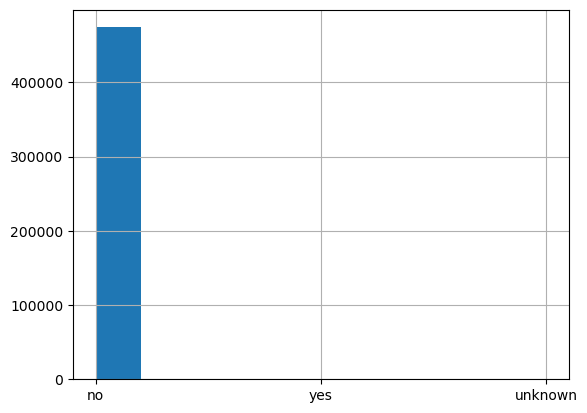

In [99]:
df['auto'].hist()